In [46]:
import control as ct 
import matplotlib.pyplot as plt 
import numpy as np 


# Primeira Questão

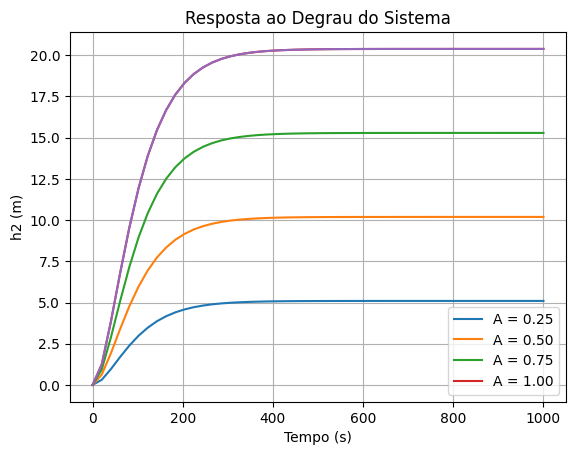

20.38440699348419


In [47]:
num = 0.007848
den = [1, 0.040221, 0.000385]
    
# Criando o sistema de controle com a função de transferência
sys = ct.tf(num, den)

# Criando um loop para plotar a resposta ao degrau para difertes valores de A
for A in np.arange(0.25,1.25, 0.25):
    t, y = ct.step_response(sys * A, T=np.linspace(0, 1000))
    plt.plot(t, y, label=f'A = {A:.2f}')
# Plotando a resposta ao degrau
plt.plot(t, y)
plt.title('Resposta ao Degrau do Sistema')
plt.xlabel('Tempo (s)')
plt.ylabel('h2 (m)')
plt.grid(True)
plt.legend()
plt.show()
print( y[-1] )  # Exibe o valor final da resposta ao degrau

# Segunda Questão

In [ ]:
# Para um degrau com amplitude de 0.25 m, calculamos o ganho K do sistema.
ganho = 0.25* num / den[2]
print(f"Valor de Estado Estacionário (Ganho K): {ganho:.2f} m")


# Descobrimos o tempo de estabilização no qual o sistema atinge 98% do valor final.
limite_inferior = y[-1] * 0.98
tempo_estabilizacao = t[np.where(y >= limite_inferior)[0][0]]
print(f"Tempo de Estabilização (t_s): {tempo_estabilizacao:.2f} s")

# Descobrimos o tempo de subida, que é o tempo necessário para a resposta do sistema ir de 10% a 90% do valor final.
t_10 = t[np.where(y >= 0.1 * y[-1])[0][0]]
t_90 = t[np.where(y >= 0.9 * y[-1])[0][0]]
tempo_subida = t_90 - t_10
print(f"Tempo de Subida (t_r, 10%-90%): {tempo_subida:.2f} s")

Valor de Estado Estacionário (Ganho K): 5.10 m
Tempo de Estabilização (t_s): 326.53 s
Tempo de Subida (t_r, 10%-90%): 183.67 s
